# Import

In [1]:
!pwd
!python --version
!which python

/home/shpaik/21-aaai2022v2/Fig1/run_synth_nonstationary
Python 3.6.10 :: Anaconda, Inc.
/home/shpaik/anaconda3/envs/py36/bin/python


In [2]:
import os
current_dir = os.getcwd()
print(current_dir)

# control the maximum number of threads that numpy uses by 8
os.environ["OMP_NUM_THREADS"] = "8" # export OMP_NUM_THREADS=4
os.environ["OPENBLAS_NUM_THREADS"] = "8" # export OPENBLAS_NUM_THREADS=4 
os.environ["MKL_NUM_THREADS"] = "8" # export MKL_NUM_THREADS=6
os.environ["VECLIB_MAXIMUM_THREADS"] = "8" # export VECLIB_MAXIMUM_THREADS=4
os.environ["NUMEXPR_NUM_THREADS"] = "8" # export NUMEXPR_NUM_THREADS=6

/home/shpaik/21-aaai2022v2/Fig1/run_synth_nonstationary


In [3]:
os.chdir("../../")
from lib_external.SCLUB import SCLUB
from lib_external.DyClu import DyClu
os.chdir(current_dir)

%run SYNTH_functions.ipynb

In [4]:
my_data = "SYNTH"

we_need_tuning = True # True: tuning will be inclued / False : use already tuned paramter

TUNED_V_LAM = {
    'Random': {'v': 0, 'lam': 0},
    'RGraphTS': {'v': 0, 'lam': 0},
    'LinTS': {'v': 0, 'lam': 0},
    'SemiRGraphTS': {'v': 0, 'lam': 0},
    'GraphUCBlocal': {'v': 0, 'lam': 0},
    'CLUB': {'v': 0, 'lam': 0},    
    'IndividualSemiRidgeGraphThompson': {'v': 0, 'lam': 0},
    'LinTS_Single': {'v': 0, 'lam': 0},
    'SemiTS_Single': {'v': 0, 'lam': 0},
    'SCLUB': {'v': 0, 'lam': 0},
    'DyClu': {'v': 0, 'lam': 0}
}

In [5]:
import numpy as np 
import networkx as nx
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.sparse import csgraph 
import scipy
import os
import random
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import time
from datetime import datetime

In [6]:
plt.style.use("ggplot")

[]

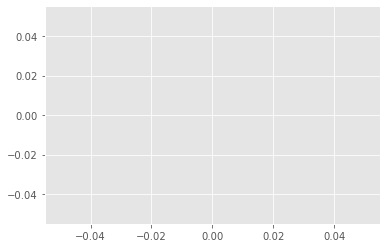

In [7]:
plt.figure()
plt.plot()

In [8]:
simul_n=5

# fix n, N, d, gamma
user_num = 30
arm_num = 10
dimension = 40
gamma = 5

time_horizon = 50000
tuning_time_horizon = 5000

nu_type = "1" # nonstationary
arm_type = "sparse"
our_graph_type = "ER"

IMG_FOLDER = "results/"
IMG_FOLDER_FOR_OS = current_dir+"/"+IMG_FOLDER

## Other settings

In [9]:
print("--------------------")
tuning_simul_n = 1

const_R = 0.1
delta = 0.05

################################## v_set and lam_set ##################################
v_set=[0.001, 0.01, 0.1, 1., 10.]
lam_set=[0.008, 0.04, 0.2, 1., 5.]

v_num = len(v_set); lam_num = len(lam_set)
v_and_lam_num = v_num * lam_num

epsilon = 1
threshold = 0.5
prob = 0.4

lap_type = "random_walk"

##### For DyClu (default option) ####
dyclu_options = {
    'tau_e': 20, # size of sliding window,
    'alpha': 0.3,
    'delta_1': 1e-1,
    'delta_2': 1e-1,
    'change_detection_alpha': 0.01,
    'neighbor_identification_alpha': 0.01 ,
    'dataSharing': False, 
    'aggregationMethod': 'combine',
    'useOutdated': True ,
    'maxNumOutdatedModels': None, 
}


##### obsolete #####
const_alpha_2 = 0.15
const_tol_1 = dimension # * 10
const_tol_2 = const_tol_1 * 1e-5 
print(f"to1_1: {const_tol_1}, to1_2: {const_tol_2},")

--------------------
to1_1: 40, to1_2: 0.0004,


## Graph & Laplacian

In [10]:
our_graph, our_laplacian, users_features, symm_laplacian = set_graph_and_lapl_for_experiment(user_num, dimension, prob, threshold, our_graph_type, lap_type, gamma)

## Tuning

In [11]:
selected_models=["Random", "RGraphTS", "LinTS", "SemiRGraphTS", "CLUB", "SCLUB", "DyClu", "GraphUCBlocal", "IndividualSemiRidgeGraphThompson", "LinTS_Single", "SemiTS_Single"]

In [12]:
if we_need_tuning == True:
        Labels, results = tuning_v_and_lam_for_SELECTED_algo_SYNTH(selected_models,\
                                                                   v_set, lam_set, user_num, arm_num, dimension, tuning_time_horizon, const_R, delta, tuning_simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)
else:
    print("No tuning.")

<set models>
RidgeTS, time = 0.0013790130615234375 sec
IndTS, time = 0.0008683204650878906 sec
SCLUB, time = 0.0014045238494873047 sec
CLUB, time = 0.0018336772918701172 sec
DyClu, time = 0.00020170211791992188 sec
SemiRidegeTS, time = 0.001386404037475586 sec
GUCBlocal, time = 0.0025217533111572266 sec
IndividualSemiRidgeGraphThompson, time = 0.0008108615875244141 sec
LinTS_Single, time = 0.0001544952392578125 sec
SemiTS_Single, time = 0.00013685226440429688 sec
(v= 0.001 lam= 0.008 ) 0 user: 5 / selected arms: 0 4 7 7 -1 7 7 3 7 6 1 8 / opt_arm: 2 / time : 0.018 sec
=====
(v= 0.001 lam= 0.008 ) 250 user: 17 / selected arms: 9 4 5 9 -1 6 6 9 5 6 0 3 / opt_arm: 9 / time : 0.026 sec
=====
(v= 0.001 lam= 0.008 ) 500 user: 12 / selected arms: 2 2 7 6 -1 3 2 2 0 3 2 5 / opt_arm: 2 / time : 0.03 sec
=====
(v= 0.001 lam= 0.008 ) 750 user: 12 / selected arms: 3 4 1 1 -1 6 7 2 0 8 8 9 / opt_arm: 2 / time : 0.031 sec
=====
(v= 0.001 lam= 0.008 ) 1000 user: 14 / selected arms: 6 3 0 7 -1 0 2 3 2

/home/shpaik/21-aaai2022v2/lib_external/SCLUB.py:145: RuntimeWarning: invalid value encountered in double_scalars
  return self.clusters[c].N / (len(self.clusters[c].users) * t)


(v= 0.01 lam= 0.008 ) 1250 user: 2 / selected arms: 1 4 7 3 -1 9 2 9 7 7 0 2 / opt_arm: 1 / time : 0.033 sec
=====
(v= 0.01 lam= 0.008 ) 1500 user: 17 / selected arms: 5 9 7 1 -1 9 6 9 7 1 9 2 / opt_arm: 9 / time : 0.035 sec
=====
(v= 0.01 lam= 0.008 ) 1750 user: 5 / selected arms: 7 7 5 7 -1 4 5 9 7 7 0 4 / opt_arm: 4 / time : 0.042 sec
=====
(v= 0.01 lam= 0.008 ) 2000 user: 12 / selected arms: 8 9 0 7 -1 7 5 3 7 9 3 9 / opt_arm: 3 / time : 0.042 sec
=====
(v= 0.01 lam= 0.008 ) 2250 user: 19 / selected arms: 3 9 9 9 -1 5 5 3 8 6 3 3 / opt_arm: 9 / time : 0.045 sec
=====
(v= 0.01 lam= 0.008 ) 2500 user: 7 / selected arms: 5 5 5 5 -1 5 5 5 0 3 5 5 / opt_arm: 5 / time : 0.047 sec
=====
(v= 0.01 lam= 0.008 ) 2750 user: 19 / selected arms: 7 7 7 5 -1 2 2 3 6 5 1 8 / opt_arm: 1 / time : 0.048 sec
=====
(v= 0.01 lam= 0.008 ) 3000 user: 13 / selected arms: 6 3 5 7 -1 9 5 8 9 3 9 3 / opt_arm: 8 / time : 0.05 sec
=====
(v= 0.01 lam= 0.008 ) 3250 user: 13 / selected arms: 2 0 5 9 -1 1 4 4 8 4 5 

## Choose best hyper parameters

Random


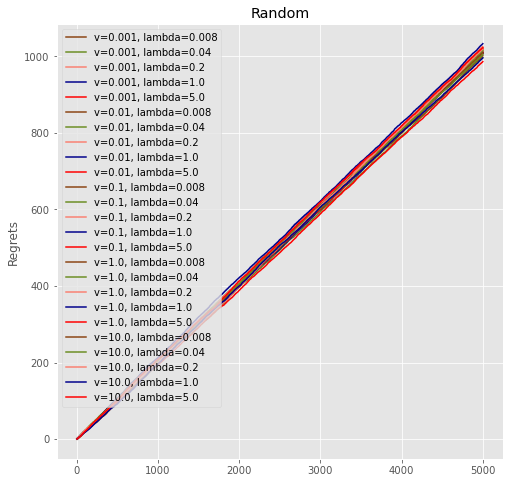

RGraphTS


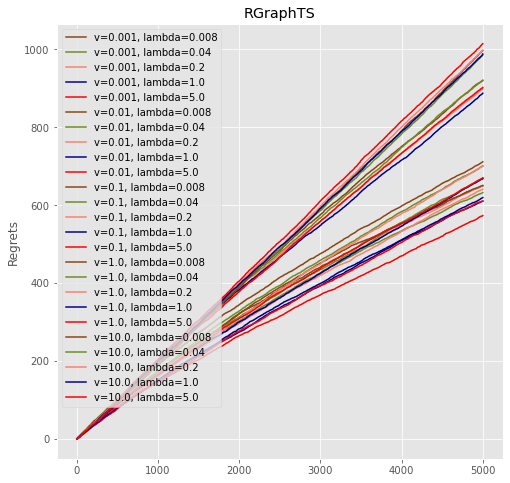

LinTS


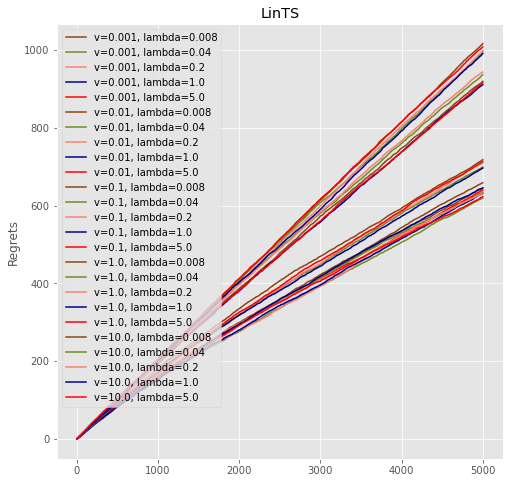

SemiRGraphTS


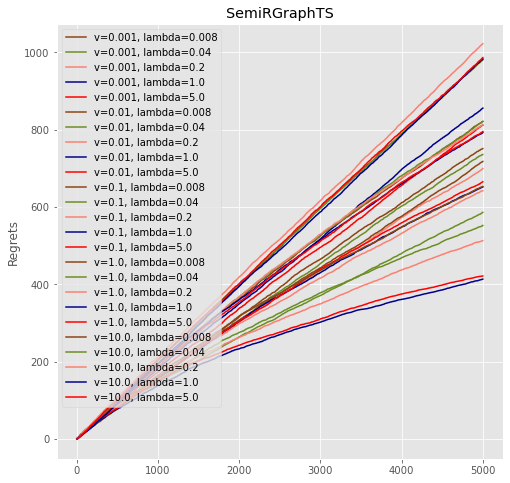

CLUB


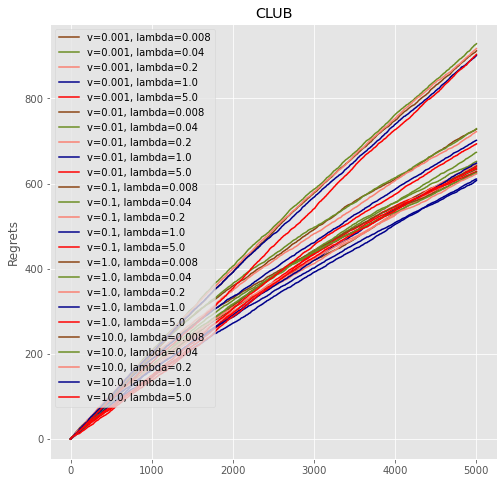

SCLUB


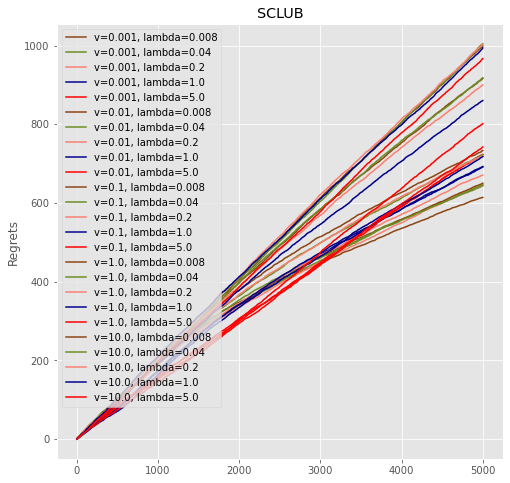

DyClu


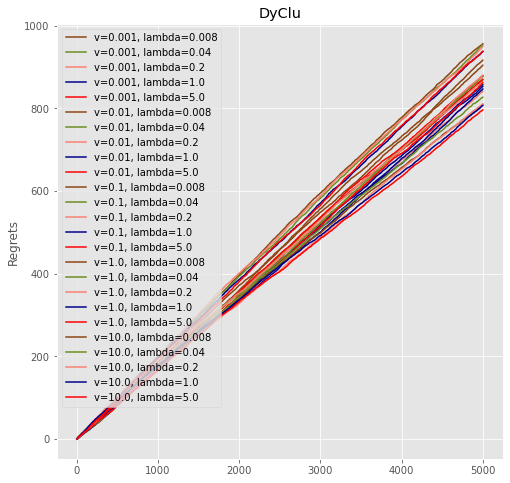

GraphUCBlocal


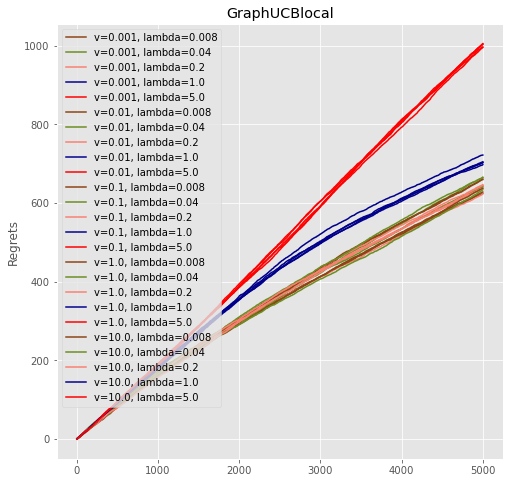

IndividualSemiRidgeGraphThompson


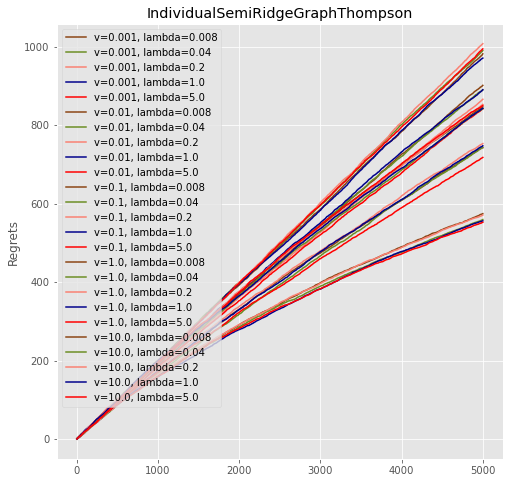

LinTS_Single


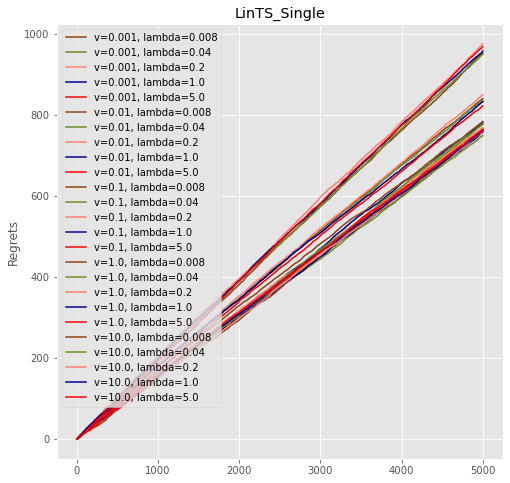

SemiTS_Single


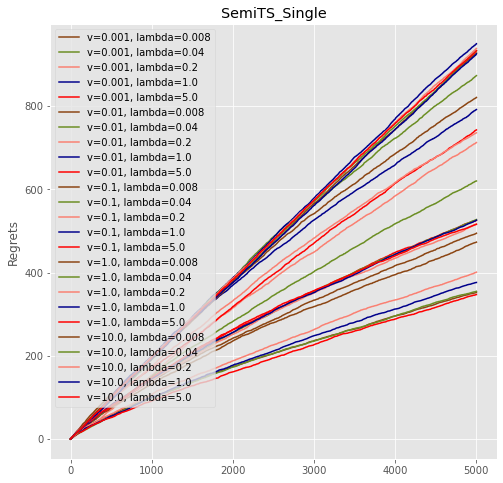

In [13]:
if we_need_tuning == True:
    algo_list = selected_models
    colors=["black", "darkred", "peru", "darkorange", "gold",
            "yellowgreen", "limegreen", "lightseagreen", "deepskyblue", "blue",
            "darkviolet", "magenta", "khaki", "plum", "grey",
            "steelblue", "lightcoral", "bisque", "darkolivegreen", "darkcyan",
            "saddlebrown", "olivedrab", "salmon", "darkblue", "red",
            "black", "darkred", "peru", "darkorange", "gold"]

    colors_by_lam = []
    temp = colors[20:20+lam_num]
    for i in range(v_num):
        colors_by_lam += temp

    colors_by_v = []
    for i in range(lam_num):
        temp = [colors[20+i] for j in range(v_num)]
        colors_by_v += temp

    RT_dict = {}
    for MODEL in algo_list:
        print(MODEL)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors, Labels, results)
        RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_lam, Labels, results)
        #RT_dict[MODEL] = show_tuning_results(MODEL, v_and_lam_num, colors_by_v, Labels, results)
else:
    print("No tuning.")

## Checkpoint: best tuning result of each algorithm

#n=30,arms=10,d=40,T=5000,arm_type=sparse
Random: v= 1.0, lam = 5.0
RGraphTS: v= 0.01, lam = 5.0
LinTS: v= 0.001, lam = 0.04
SCLUB: v= 0.001, lam = 0.008
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.1, lam = 1.0
DyClu: v= 1.0, lam = 5.0
SemiRGraphTS: v= 0.1, lam = 1.0
GraphUCBlocal: v= 0.001, lam = 0.2
IndividualSemiRidgeGraphThompson: v= 0.1, lam = 5.0
LinTS_Single: v= 0.01, lam = 0.04
SemiTS_Single: v= 0.1, lam = 5.0



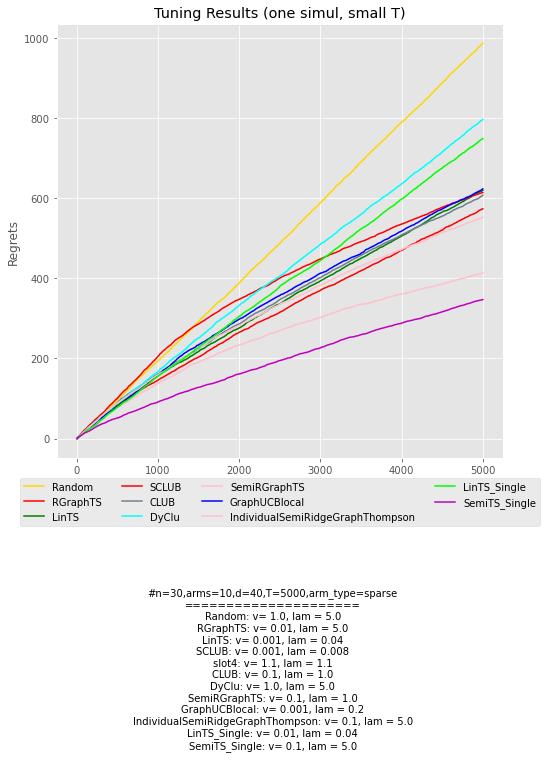

In [14]:
colors = ["gold", "r","g","r","k","slategrey","aqua","pink", "blue", "pink", "lime", "m"]
if we_need_tuning == True:
    best_v_lam_pair_dict, tuning_info = return_best_v_and_lambda_pair_real(selected_models, user_num, arm_num, dimension, tuning_time_horizon, arm_type, colors, results, RT_dict)
    # synthetic data also uses "return_best_..._pair_real"
else:
    print("No tuning.")
    best_v_lam_pair_dict = TUNED_V_LAM
    tuning_info = "No tuning.\n"+ str(TUNED_V_LAM).replace('}, ', '}\n')[1:-1]

In [15]:
print("we_need_tuning =", we_need_tuning)
best_v_lam_pair_dict

we_need_tuning = True


{'Random': {'v': 1.0, 'lam': 5.0},
 'RGraphTS': {'v': 0.01, 'lam': 5.0},
 'LinTS': {'v': 0.001, 'lam': 0.04},
 'SCLUB': {'v': 0.001, 'lam': 0.008},
 'slot4': {'v': 1.1, 'lam': 1.1},
 'CLUB': {'v': 0.1, 'lam': 1.0},
 'DyClu': {'v': 1.0, 'lam': 5.0},
 'SemiRGraphTS': {'v': 0.1, 'lam': 1.0},
 'GraphUCBlocal': {'v': 0.001, 'lam': 0.2},
 'IndividualSemiRidgeGraphThompson': {'v': 0.1, 'lam': 5.0},
 'LinTS_Single': {'v': 0.01, 'lam': 0.04},
 'SemiTS_Single': {'v': 0.1, 'lam': 5.0}}

## Final simulation with best hyper parameters

In [16]:
cumulated_regret_dict, info_computing_time = run_all_algo_with_best_v_lam_SYNTH(selected_models,\
                                                                                best_v_lam_pair_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, our_graph, our_laplacian, symm_laplacian, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type)

<set models>
RidgeTS, time = 0.0010292530059814453 sec
IndTS, time = 0.0007023811340332031 sec
SCLUB, time = 0.000997304916381836 sec
CLUB, time = 0.0013413429260253906 sec
DyClu, time = 6.079673767089844e-05 sec
SemiRidegeTS, time = 0.001268625259399414 sec
GUCBlocal, time = 0.0016605854034423828 sec
IndividualSemiRidgeGraphThompson, time = 0.0005357265472412109 sec
LinTS_Single, time = 2.7418136596679688e-05 sec
SemiTS_Single, time = 2.5272369384765625e-05 sec
0 user: 24 / selected arms: 8 6 0 8 -1 8 8 5 7 9 3 7 / opt_arm: 9 / time : 0.019 sec
=====
500 user: 5 / selected arms: 5 7 7 6 -1 6 2 3 7 1 7 9 / opt_arm: 9 / time : 0.031 sec
=====
1000 user: 1 / selected arms: 3 0 2 9 -1 2 2 5 6 3 2 5 / opt_arm: 2 / time : 0.032 sec
=====
1500 user: 22 / selected arms: 9 2 6 8 -1 4 0 4 9 9 6 9 / opt_arm: 9 / time : 0.033 sec
=====
2000 user: 22 / selected arms: 4 3 3 5 -1 1 4 5 3 3 6 5 / opt_arm: 5 / time : 0.033 sec
=====
2500 user: 13 / selected arms: 6 0 9 7 -1 2 6 0 3 0 0 0 / opt_arm: 0 

/home/shpaik/21-aaai2022v2/lib_external/SCLUB.py:145: RuntimeWarning: invalid value encountered in double_scalars
  return self.clusters[c].N / (len(self.clusters[c].users) * t)


1500 user: 28 / selected arms: 0 9 1 8 -1 3 8 6 3 4 8 5 / opt_arm: 1 / time : 0.033 sec
=====
2000 user: 21 / selected arms: 5 5 1 2 -1 1 2 5 2 0 3 5 / opt_arm: 5 / time : 0.033 sec
=====
2500 user: 11 / selected arms: 5 5 8 8 -1 8 5 8 2 3 4 7 / opt_arm: 8 / time : 0.035 sec
=====
3000 user: 3 / selected arms: 7 5 2 5 -1 8 4 8 0 5 8 6 / opt_arm: 5 / time : 0.035 sec
=====
3500 user: 27 / selected arms: 0 9 5 5 -1 5 1 1 6 3 3 5 / opt_arm: 5 / time : 0.035 sec
=====
4000 user: 25 / selected arms: 5 1 9 5 -1 1 5 9 9 8 1 9 / opt_arm: 1 / time : 0.035 sec
=====
4500 user: 24 / selected arms: 2 9 4 6 -1 0 6 4 9 1 0 6 / opt_arm: 0 / time : 0.036 sec
=====
5000 user: 24 / selected arms: 5 8 2 4 -1 7 7 2 8 8 3 6 / opt_arm: 2 / time : 0.036 sec
=====
5500 user: 1 / selected arms: 1 6 1 6 -1 5 6 6 6 6 3 7 / opt_arm: 6 / time : 0.037 sec
=====
6000 user: 7 / selected arms: 9 4 8 8 -1 5 8 5 1 8 5 5 / opt_arm: 5 / time : 0.037 sec
=====
6500 user: 26 / selected arms: 4 1 9 1 -1 1 3 2 1 2 6 2 / opt_a

## Final plot

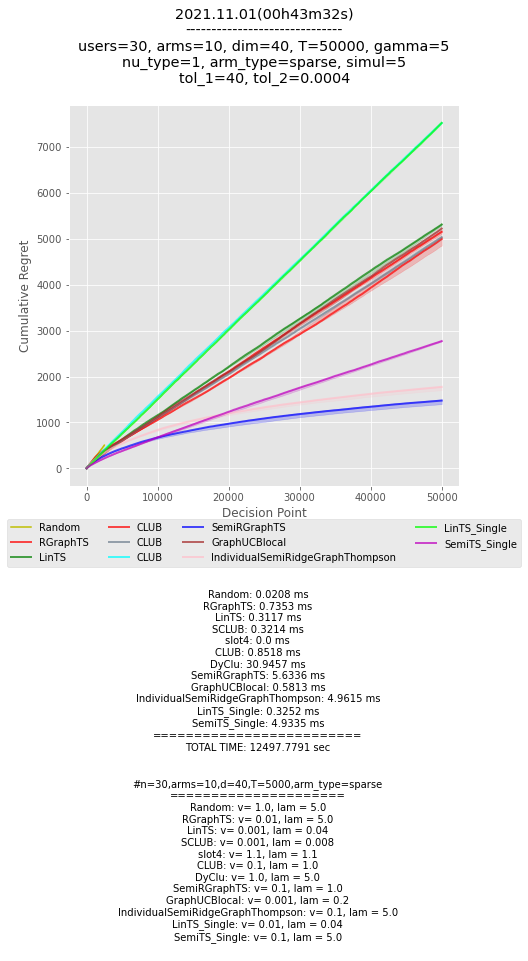


<parameters>
user_num = 30 / arm_num = 10 / dimension = 40
delta = 0.05 / R = 0.1 / gamma (for smooth Theta) = 5
-----
const_tol_1 = 40 / const_tol_2 = 0.0004
graph = ER / laplacian=random_walk / threshold = 0.5 / prob = 0.4 / const_alpha_2 = 0.15
########################################

<mean computing time>
Random: 0.0208 ms
RGraphTS: 0.7353 ms
LinTS: 0.3117 ms
SCLUB: 0.3214 ms
slot4: 0.0 ms
CLUB: 0.8518 ms
DyClu: 30.9457 ms
SemiRGraphTS: 5.6336 ms
GraphUCBlocal: 0.5813 ms
IndividualSemiRidgeGraphThompson: 4.9615 ms
LinTS_Single: 0.3252 ms
SemiTS_Single: 4.9335 ms
TOTAL TIME: 12497.7791 sec
########################################

<best tuning parameter>
#n=30,arms=10,d=40,T=5000,arm_type=sparse
Random: v= 1.0, lam = 5.0
RGraphTS: v= 0.01, lam = 5.0
LinTS: v= 0.001, lam = 0.04
SCLUB: v= 0.001, lam = 0.008
slot4: v= 1.1, lam = 1.1
CLUB: v= 0.1, lam = 1.0
DyClu: v= 1.0, lam = 5.0
SemiRGraphTS: v= 0.1, lam = 1.0
GraphUCBlocal: v= 0.001, lam = 0.2
IndividualSemiRidgeGraphThompson: v= 

In [17]:
NOW = datetime.now().strftime('%Y.%m.%d(%Hh%Mm%Ss)')
IMG_NAME = "arm="+arm_type +"_nu="+ nu_type +"_g="+our_graph_type+"_T="+str(time_horizon) + "_simul"+str(simul_n) +"("+ NOW+ ").png"
IMG_PATH = IMG_FOLDER+"/"+IMG_NAME

if not os.path.exists(IMG_FOLDER_FOR_OS):
    os.makedirs(IMG_FOLDER_FOR_OS)

SAVE = True # False

const_linewidth = 2
const_transparency = 0.7
const_cut_random = 20 # Random
const_cut_semi = 1 # SemiRGraphTS

show_and_save_plot(SAVE, const_linewidth, const_transparency, const_cut_random, const_cut_semi, cumulated_regret_dict, user_num, arm_num,  dimension, time_horizon, const_R, delta, simul_n, epsilon, threshold, prob, gamma, lap_type, our_graph_type, const_alpha_2, const_tol_1, const_tol_2, nu_type, arm_type, info_computing_time, tuning_info, IMG_PATH, NOW)


In [18]:
print(NOW)

2021.11.01(00h43m32s)


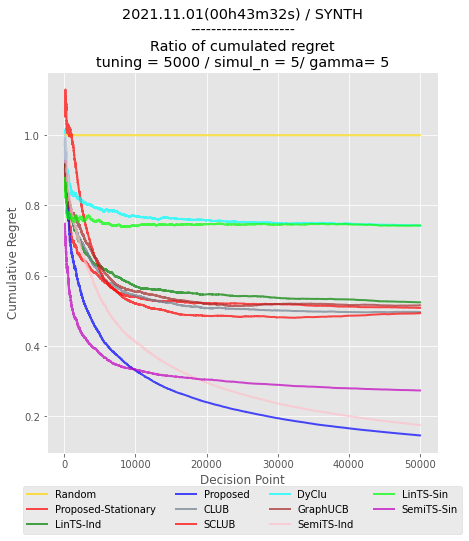

In [19]:
start = 100 # ignore round 1 to "start"
steps=np.arange(start+1,time_horizon+1)

LW = const_linewidth
TP = const_transparency
plt.figure(figsize=(7,7))

colors_dict = {"Random": "gold",
               "RGraphTS" : "r",
               "LinTS" : "g",
               "SemiRGraphTS" : "blue",
               "GraphUCBlocal" : "brown",
               "CLUB" : "slategrey",
               "SCLUB" : "r",
               "DyClu" : "aqua",
               "IndividualSemiRidgeGraphThompson" : "pink",
               "LinTS_Single" : "lime",
               "SemiTS_Single": "m"}

labels_dict = {"Random": "Random",
               "RGraphTS" : "Proposed-Stationary",
               "LinTS" : "LinTS-Ind",
               "SemiRGraphTS" : "Proposed",
               "GraphUCBlocal" : "GraphUCB",
               "CLUB" : "CLUB",
               "SCLUB" : "SCLUB",
               "DyClu" : "DyClu",
               "IndividualSemiRidgeGraphThompson" : "SemiTS-Ind",
               "LinTS_Single" : "LinTS-Sin",
               "SemiTS_Single": "SemiTS-Sin"}

denominator = np.median(cumulated_regret_dict["Random"], axis=0)[start:]

for MODEL in selected_models:
    COLOR = colors_dict[MODEL]
    numerator = np.median(cumulated_regret_dict[MODEL], axis=0)[start:]
    fraction = np.divide(numerator, denominator)
    plt.plot(steps, fraction, COLOR, linewidth = LW, alpha =  TP, label=labels_dict[MODEL])
    
plt.xlabel('Decision Point')
plt.ylabel('Cumulative Regret')
if we_need_tuning == True:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + str(tuning_time_horizon)+" / simul_n = " + str(simul_n) +"/ gamma= "+str(gamma))
else:
    plt.title(NOW+" / "+ my_data  + "\n--------------------\n"+"Ratio of cumulated regret\n"+"tuning = " + "NO"+" / simul_n = " + str(simul_n) +"/ gamma= "+str(gamma))
plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15),fancybox=True,ncol=4)

if SAVE == True:
    RATIO_FOLDER = IMG_FOLDER+"/ratio_image_folder"
    RATIO_FOLDER_FOR_OS = current_dir+"/"+ RATIO_FOLDER
    if not os.path.exists(RATIO_FOLDER_FOR_OS):
        os.makedirs(RATIO_FOLDER_FOR_OS)
        
    
plt.show()

In [20]:
if SAVE == True:
    REGRET_FOLDER = IMG_FOLDER+"/regret_saving_folder/regret_"+NOW
    REGRET_FOLDER_FOR_OS = current_dir+"/"+REGRET_FOLDER
    if not os.path.exists(REGRET_FOLDER_FOR_OS):
        os.makedirs(REGRET_FOLDER_FOR_OS)

    for MODEL in selected_models:
        np.save(REGRET_FOLDER+'/cumulated_regret_'+ MODEL +"_gamma_"+str(gamma)+'.npy', cumulated_regret_dict[MODEL])